# assembled functions

## unify_to_train_test
these function transform all those 10 different files, unifies it and split into train and test.

## spacy_actor
here is where the data is processed. It removes stop word, turn these words to there base form, and also cleans the data from numbers and other special characters

In [118]:
import numpy as np
import spacy
import re
from func_spacy_actor import spacy_actor, unify_to_train_test


In [65]:
artist_filesp=['aero_disco.p','beatles_disco.p','blacksabb_disco.p','cash_disco.p','elvis_disco.p','frank_disco.p','led_disco.p','pink_disco.p','rolling_disco.p','who_disco.p']

In [45]:
X_trainall, X_testall, y_trainall, y_testall = unify_to_train_test(artist_filesp)

In [46]:
X_trainall=spacy_actor(X_trainall)
X_testall=spacy_actor(X_testall)

402336
135357



# Pipeline 
make_pipeline is an easy and fast way to 'automize' an pipeline.
through these tool I could try different models

## feature_extraction.text
first the pipeline transforms the text data into a matrix with all the words in Xtrain, than gives weights to each word, in an special way where words that are common in every music wouldn't have its importance super estimated

## models
than i tried some different classifier models 
multinomial naive bayes had the best score on the test data, 70%.
an acceptable score considering the difficulty of the problem where all 10 artists fall in the same music genre and time.  

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import make_pipeline

In [48]:
cv = CountVectorizer()
tf = TfidfTransformer()
m = LogisticRegression(multi_class='ovr', )
nb = MultinomialNB(alpha=0.01)
gnb = GaussianNB()




# Pipeline Logist Regression

In [23]:
pipelog = make_pipeline(cv, tf, m)
pipelog.fit(X_trainall, y_trainall)
pipelog.score(X_trainall, y_trainall)

/home/mateus/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.952

In [24]:
pipelog.score(X_testall, y_testall)

0.672



# Pipeline Naive Bayes Gaussian

In [127]:
# from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()
    
dense = DenseTransformer()

In [144]:

pipegnb = make_pipeline(cv, tf, dense, gnb)
pipegnb.fit(X_trainall, y_trainall)
pipegnb.score(X_trainall, y_trainall)

0.9906666666666667

In [145]:
pipegnb.score(X_testall, y_testall)

0.692




# Pipeline Naive Bayes

In [136]:
pipenb = make_pipeline(cv, tf, nb)
pipenb.fit(X_trainall, y_trainall)
pipenb.score(X_trainall, y_trainall)

0.9893333333333333

In [129]:
ypred = pipenb.predict(X_testall)
pipenb.score(X_testall, y_testall)

0.704

# VISUALIZATION

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [80]:
conf = confusion_matrix(y_testall,ypred)
artists = [x[:-8] for x in artist_filesp]

Text(0.5, 1, 'Confusion Matrix')

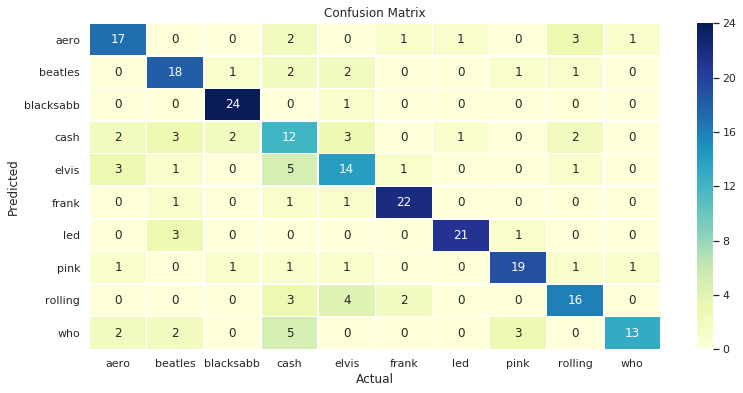

In [143]:
plt.figure(figsize=(12.8,6))
ax = sns.heatmap(conf, annot=True, fmt="d",linewidths=.5, cmap="YlGnBu", xticklabels=artists, yticklabels=artists)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
# plt.savefig('Confusion_matrix_NB')
# plt.show()
